In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading Data


In [219]:
data=pd.read_csv("breast-cancer.csv")


# DATA CLEANING

In [220]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [221]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [222]:
data.rename(columns={'diagnosis': 'target'},inplace=True)
data.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [223]:
data.drop('id' , axis = 1)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [224]:
data.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [225]:
data['target']=data['target'].map({'M':0 ,'B':1})

# Fitting Model

In [226]:
# Train and Test Split
x=pd.DataFrame(data=data)
y=pd.Series(data.target)
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2)

In [227]:
model=LogisticRegression()
model.fit(x_train , y_train)

C:\Users\namee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [228]:
y_pred=model.predict(x_test)

In [229]:
print('accuray:' , accuracy_score(y_test , y_pred))

accuray: 0.9210526315789473


In [230]:
# applying RandomForest
m=RandomForestClassifier(random_state=42)
m.fit(x_train , y_train)
y1_pred=model.predict(x_test)
print('accuracy:' , accuracy_score(y_test , y1_pred))

accuracy: 0.9210526315789473


# PERFORMING EDA

In [231]:
#Finding features that contribute more in prediction
model = RandomForestClassifier()
model.fit(x, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)

print(importances)

target                     0.216832
concave points_worst       0.140986
concave points_mean        0.122944
perimeter_worst            0.092921
area_worst                 0.071440
radius_worst               0.062048
perimeter_mean             0.055707
concavity_mean             0.037483
area_mean                  0.036200
radius_mean                0.022480
area_se                    0.022285
concavity_worst            0.017423
perimeter_se               0.011719
radius_se                  0.011145
texture_worst              0.009407
symmetry_worst             0.008065
compactness_worst          0.006956
compactness_mean           0.006723
texture_mean               0.006389
concave points_se          0.005756
smoothness_worst           0.005463
fractal_dimension_worst    0.005105
concavity_se               0.003626
smoothness_se              0.003414
fractal_dimension_mean     0.003125
texture_se                 0.002624
smoothness_mean            0.002559
compactness_se             0

In [232]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.93      0.94      0.93        68

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [233]:
print("\nClassification Report:\n", classification_report(y_test, y1_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.93      0.94      0.93        68

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [234]:
#  Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



[[41  5]
 [ 4 64]]


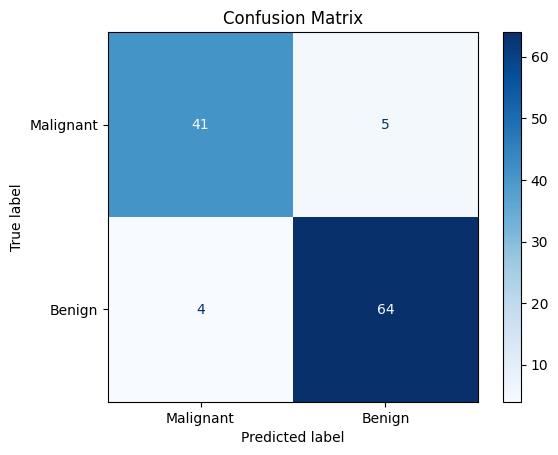

In [235]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Malignant", "Benign"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [236]:
corr=data.corr()['target'].sort_values()

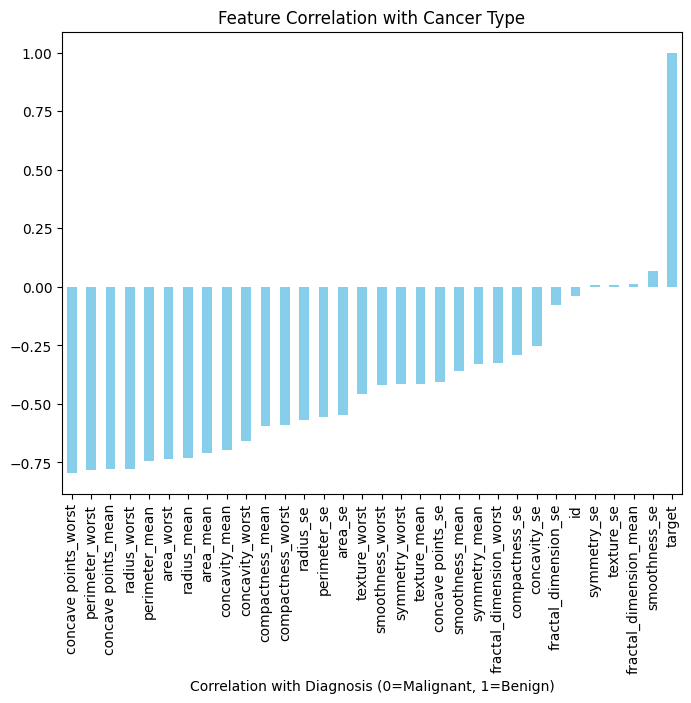

In [237]:
plt.figure(figsize=(8, 6))
corr.plot(kind='bar', color='skyblue')
plt.xlabel("Correlation with Diagnosis (0=Malignant, 1=Benign)")
plt.title("Feature Correlation with Cancer Type")
plt.show()

In [238]:
malignant_data=data[data['target'] == 0].describe()

In [239]:
print(malignant_data)
malignant_data.head()

                 id  target  radius_mean  texture_mean  perimeter_mean  \
count  2.120000e+02   212.0   212.000000    212.000000      212.000000   
mean   3.681805e+07     0.0    17.462830     21.604906      115.365377   
std    1.378965e+08     0.0     3.203971      3.779470       21.854653   
min    8.670000e+03     0.0    10.950000     10.380000       71.900000   
25%    8.613450e+05     0.0    15.075000     19.327500       98.745000   
50%    8.953665e+05     0.0    17.325000     21.460000      114.200000   
75%    8.911290e+06     0.0    19.590000     23.765000      129.925000   
max    9.112962e+08     0.0    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   212.000000       212.000000        212.000000      212.000000   
mean    978.376415         0.102898          0.145188        0.160775   
std     367.937978         0.012608          0.053987        0.075019   
min     361.600000         0.073710      

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,0.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,0.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,0.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302


In [240]:
benin_data=data[data['target'] ==1].describe()

In [241]:
print(benin_data)

                 id  target  radius_mean  texture_mean  perimeter_mean  \
count  3.570000e+02   357.0   357.000000    357.000000      357.000000   
mean   2.654382e+07     1.0    12.146524     17.914762       78.075406   
std    1.167397e+08     0.0     1.780512      3.995125       11.807438   
min    8.913000e+03     1.0     6.981000      9.710000       43.790000   
25%    8.746620e+05     1.0    11.080000     15.150000       70.870000   
50%    9.089160e+05     1.0    12.200000     17.390000       78.180000   
75%    8.812816e+06     1.0    13.370000     19.760000       86.100000   
max    9.113205e+08     1.0    17.850000     33.810000      114.600000   

        area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count  357.000000       357.000000        357.000000      357.000000   
mean   462.790196         0.092478          0.080085        0.046058   
std    134.287118         0.013446          0.033750        0.043442   
min    143.500000         0.052630          0

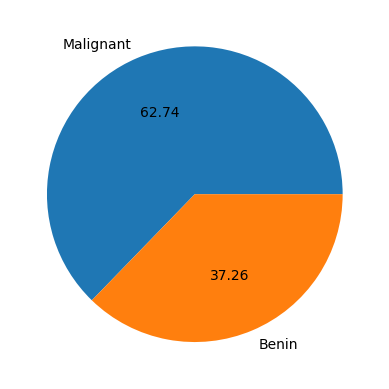

In [242]:
plt.pie(data['target'].value_counts() , labels=['Malignant' , 'Benin'] , autopct="%0.2f")
plt.show()